ФБ-24 Тихонова Анастасія Лабораторна робота 6

ЗАВДАННЯ 1

Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу результатів.

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

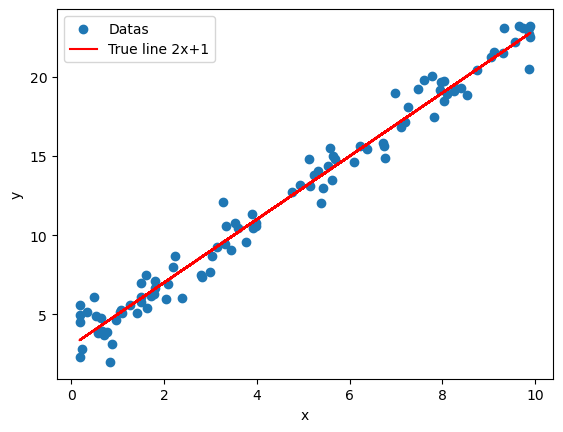

In [18]:
k = 2
b = 3

num_points = 100
x = np.random.rand(num_points)*10
y = k * x + b + np.random.randn(num_points)

plt.scatter(x, y, label='Datas')
plt.plot(x, k * x + b, color='red', label='True line 2x+1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.

In [19]:
def least_sq(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy_mean = np.mean(x * y)
    x_squared_mean = np.mean(x ** 2)


    k_hat = (xy_mean - x_mean * y_mean) / (x_squared_mean - x_mean ** 2)
    b_hat = y_mean - k_hat * x_mean

    return k_hat, b_hat

k_hat, b_hat = least_sq(x, y)
print("Оцінка k^:", k_hat)
print("Оцінка b^:", b_hat)

Оцінка k^: 2.0060681258738526
Оцінка b^: 2.999549464401472


Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [20]:
k_polyfit, b_polyfit = np.polyfit(x, y, 1)
print("Оцінки параметрів за методом найменших квадратів:")
print(f"k^ = {k_hat}, b^ = {b_hat}")

print("\nОцінки параметрів за допомогою np.polyfit:")
print(f"k = {k_polyfit}, b = {b_polyfit}")

print("\nПочаткові параметри прямої:")
print(f"k = {k}, b = {b}")

Оцінки параметрів за методом найменших квадратів:
k^ = 2.0060681258738526, b^ = 2.999549464401472

Оцінки параметрів за допомогою np.polyfit:
k = 2.00606812587385, b = 2.999549464401479

Початкові параметри прямої:
k = 2, b = 3


Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

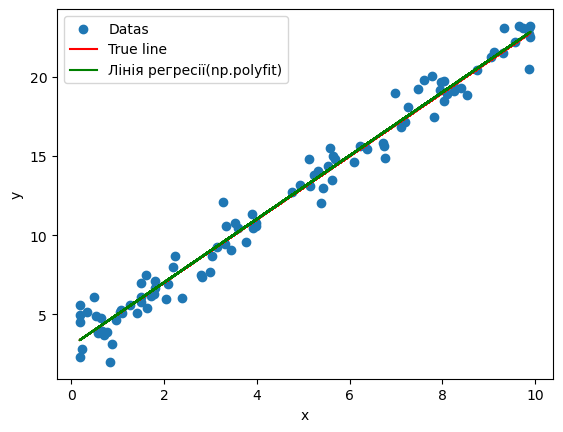

In [30]:
plt.scatter(x, y, label='Datas')
plt.plot(x, k*x + b, color='red', label='True line')
plt.plot(x, k_polyfit*x + b_polyfit, color='green', label='Лінія регресії(np.polyfit)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

ЗАВДАННЯ 2

Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [22]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    k = 0
    b = 0

    for i in range(n_iter):
        y_pred = k * x + b

        dk = np.sum(2 * (y_pred - y) * x) / x.size
        db = np.sum(2 * (y_pred - y)) / x.size

        k -= learning_rate * dk
        b -= learning_rate * db

    return k, b

learning_rate = 0.01
n_iter = 1000
k_gd, b_gd = gradient_descent(x, y, learning_rate, n_iter)
print(f"Оцінки параметрів за методом градієнтного спуску: k = {k_gd}, b = {b_gd}")


Оцінки параметрів за методом градієнтного спуску: k = 2.006843667564091, b = 2.9943771026814656


Додайте отриману лінію регресії на загальний графік

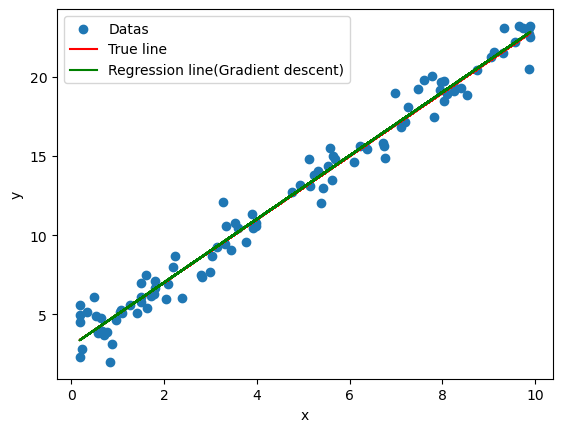

In [25]:
plt.scatter(x, y, label='Datas')
plt.plot(x, k*x + b, color='red', label='True line')
plt.plot(x, k_gd*x + b_gd, color='green', label='Regression line(Gradient descent)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Побудуйте графік похибки від кількості ітерацій, зробіть висновки

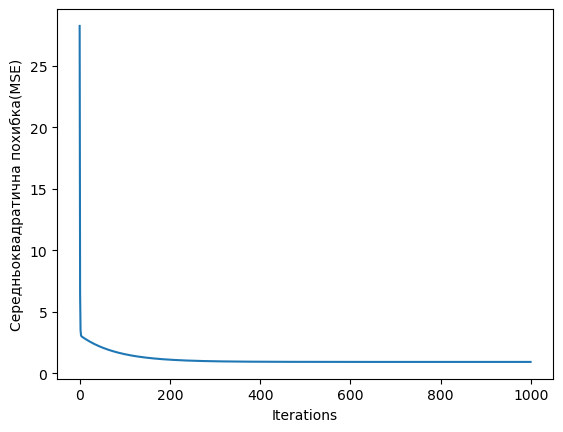

In [28]:
def compute_mse(k, b, x, y):
    y_pred = k * x + b
    mse = np.mean((y - y_pred) ** 2)
    return mse

mse_history = []
for i in range(n_iter):
    k_gd, b_gd = gradient_descent(x, y, learning_rate, i+1)
    mse = compute_mse(k_gd, b_gd, x, y)
    mse_history.append(mse)

plt.plot(range(n_iter), mse_history)
plt.xlabel('Iterations')
plt.ylabel('Середньоквадратична похибка(MSE)')
plt.show()

Порівняйте отримані результати з результатами попереднього завдання

In [27]:
print("\nПорівняння оцінок параметрів:")
print(f"Найменші квадрати: k = {k_hat}, b = {b_hat}")
print(f"Градієнтний спуск: k = {k_gd}, b = {b_gd}")
print(f"np.polyfit: k = {k_polyfit}, b = {b_polyfit}")


Порівняння оцінок параметрів:
Найменші квадрати: k = 2.0060681258738526, b = 2.999549464401472
Градієнтний спуск: k = 2.006843667564091, b = 2.9943771026814656
np.polyfit: k = 2.00606812587385, b = 2.999549464401479
